# **Phase 2 Project** 

# Business Understanding
  ## Overview
Primetime Realtors situated in the heart of a North Western County acts as the conduit for transforming homeownership aspirations into tangible realities. Committed to unwavering excellence and employing data-driven methodologies, the agency aspires to lead the way in achieving optimal pricing and facilitating successful real estate endeavors. Its overarching objective is to surpass traditional limitations by leveraging technology and analytical insights to revolutionize the real estate landscape as we perceive it.
  ## Business Problem 
  The housing market in King County displays diverse trends and influences on property prices. Yet, a more thorough understanding of these factors is necessary to assist real estate stakeholders in making informed choices. The main challenge is to construct a reliable pricing model capable of accurately forecasting house prices using multiple features. This model should offer insights into the most influential features on property prices, empowering Primetime Realtors make well-informed decisions.
  ## Objectives
- To identify key features that significantly influence house prices in the northwestern county.
- To develop an optimal pricing strategy using a robust multiple linear regression model.
- To help improve the agency's annual revenue by leveraging the analytical insights and pricing strategy developed through this project.



## Importing the Data

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import warnings
%matplotlib inline
sns.set_style('dark')
warnings.filterwarnings('ignore')
data = pd.read_csv('data/kc_house_data.csv')

data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Loading  the Data Into a Data Frame

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

## Data Understanding & Preparation
Here we will explore the data to get a better understanding of its state, then decide on the steps we need to take to clean it. We will begin by defining some functions for the following tasks:
- getting the shape of the data
- getting data info
- simple check for missing data
- duplicates
- descriptive stats

We will then group together the helper function under a new function that explores the data for the above attributes. 

In [3]:
# function for shape of the data 

def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns", '\n')

    return out

In [4]:
# function for info of the data 

def data_info(data):
    """Simple function to provide the info of the data"""
    out = print(data.info(), '\n')
    
    return out

In [5]:
# function to check for missing values

def data_missing(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values", '\n')
    else:
        out = print(f"The Data has missing values.", '\n')

    return out

In [6]:
# function to check for duplicates

def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        out = print("The Data has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [7]:
# function to check for duplicates on the ID column

def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        out = print(f"The column {column.title()} has no duplicates", '\n')
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        out = print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.", '\n')

In [8]:
# helper function to check for descriptive stats

def data_describe(data):
    """Simple function to check the descriptive values of the data"""
    out = print(data.describe(), '\n')
    
    return out

In [9]:
# overall function for data understanding

def explore(data):
    """Group of functions to explore data """
    out1 = data_shape(data)
    out2 = data_info(data)
    out3 = data_missing(data)
    out4 = identify_duplicates(data)
    out5 = unique_column_duplicates(data, 'id')
    out6 = data_describe(data)
    
    return out1, out2, out3, out4, out5

From below, data has:
- 21597 houses sold
- 21 house features : 6 string variables and 15 numeric variables. `date` column is encoded as string instead of datetime, while `sqft_basement` is enconded as string instead of float. These 2 will be corrected
- Missing values which will be investigated and treated
- No duplicates. However, the `id` column which should contain unique identifiers has 177 duplicated values. These will be checked
- From the descriptive stats, there's also potential for some outliers which will need to be veried. 

#### Duplicated Id Column
Id column duplicates to be dropped in the process below

In [10]:
print(identify_duplicates(data))
print(unique_column_duplicates(data, 'id')) 

The Data has no duplicates 

None
The column Id has 177 duplicated rows.
This constitutes 0.82% of the data set. 

None


In [11]:
def drop_duplicates(df, column):
    """function to drop duplicated rows"""
    
    df.drop_duplicates(subset=column, keep='first', inplace=True)
    confirmation = unique_column_duplicates(data, 'id')
    return confirmation

drop_duplicates(data, 'id') 

The column Id has no duplicates 



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our data has 6 variables as objects i.e Date, waterfront,view, condition, grade,sqft_basement

### Dealing with the Missing Values

In [13]:
# Find the percentage of missing values in each column
percantage_msng_values = df.isnull().sum()* 100 / len (df)

print(percantage_msng_values.round(2))

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64


Our data frame has some missing values in waterfront, view and year renovated columns constituting to 11%, 0.29% and 17.79% respectively.

In [14]:
# look for unique values in the "waterfront" column
unique_values_wf = df['waterfront'].unique()

print(unique_values_wf)

[nan 'NO' 'YES']


In [15]:
# look for total number of houses where 'waterfront' is 'yes'
total_waterfront_yes = len(df[df['waterfront'] == 'YES'])

# Print the total number
print("Total number of houses where 'waterfront' is 'YES':", total_waterfront_yes)

Total number of houses where 'waterfront' is 'YES': 146


In [16]:
# Replace null values in 'waterfront' with 'NO'
df['waterfront'].fillna('NO', inplace=True)

The waterfront columns contain nan, No and Yes unique values. We decided to fill nan entries with No on assumption that these houses lacked a waterfront and hence entries made as nan

In [17]:
# look unique values in the view column
unique_values_view = df['view'].unique()

print(unique_values_view)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [18]:
# search for how many houses have null values under the 'view' column
null_values_view = df['view'].isnull().sum()

# Print the total number
print("Total number of houses with null values under the 'view' column:", null_values_view)

Total number of houses with null values under the 'view' column: 63


In [19]:
#find out how many houses with no view
total_view_none = len(df[df['view'] == 'NONE'])

# Print the total number
print("Total number of houses where 'view' is 'NONE':", total_view_none)

Total number of houses where 'view' is 'NONE': 19422


In [20]:
# Replace NaN values in the 'view' column with 'NONE'
df['view'].fillna('NONE', inplace=True)

The view columns consist of various unique values such as 'NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', and 'FAIR'. There are a total of 63 entries marked as 'nan'. After careful consideration, we opted to replace these 'nan' entries with 'NONE', under the assumption that these particular houses do not possess a view of notable quality.

In [21]:
# checking unique values in the the yr_renovated column
unique_values_renovation = df['yr_renovated'].unique()
unique_values_renovation.sort()

print(unique_values_renovation) 

[   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


In [22]:
# Checking the number of houses with 'yr_renovated' greater than 0 
houses_with_renovations = df[df['yr_renovated'] > 0]

# Print the number of houses with 'yr_renovated' greater than 0
print("\nNumber of houses with 'yr_renovated' greater than 0:", len(houses_with_renovations)) 


Number of houses with 'yr_renovated' greater than 0: 744


In [23]:
# Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True) 

The yr_renovated column contains years ranging from 1934 to 2015, but it also includes entries with the values 0 and 'nan'. We inferred that these entries represent houses that have never undergone renovation. Subsequently, we replaced the 'nan' entries with 0 to reflect this assumption.

In [24]:
# Checking the condition column
unique_values_condition = df['condition'].unique()

print(unique_values_condition) 

['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [25]:
# Checking the grade column
unique_values_grade = df['grade'].unique()

# Sorting the unique values in ascending order
unique_values_grade.sort()

print(unique_values_grade) 

['10 Very Good' '11 Excellent' '12 Luxury' '13 Mansion' '3 Poor' '4 Low'
 '5 Fair' '6 Low Average' '7 Average' '8 Good' '9 Better']


In [26]:
missing_values_percent = df.isnull().sum() * 100 / len(df)

print(missing_values_percent) 

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


Our data has been thoroughly cleaned, and there are no longer any missing values present.

In [27]:
# Check the 'sqft_basement' column
df['sqft_basement'].head(8) 

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [28]:
# check number of '?' in 'sqft_basement' column
count_question_marks = df['sqft_basement'].str.count('\?').sum()

# Calculate the percentage of '?' in 'sqft_basement' column
percentage_question_marks = (count_question_marks / len(df['sqft_basement'])) * 100

print("Number of '?' in 'sqft_basement' column:", count_question_marks)
print("Percentage of '?' in 'sqft_basement' column:", percentage_question_marks.round(2))

Number of '?' in 'sqft_basement' column: 454
Percentage of '?' in 'sqft_basement' column: 2.1


In [29]:
# Drop rows with '?' in the 'sqft_basement' column
df = df[df['sqft_basement'] != '?']

# Convert the 'sqft_basement' column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [30]:
# Remove duplicates in 'df' in place
df.drop_duplicates(inplace=True) 

### Data Conversion
Conversion of various expected features to the correct data types

In [31]:
# Convert the 'year_renovated' column to integers
df['yr_renovated'] = df['yr_renovated'].astype(int) 

In [32]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y') 

In [33]:
#9. Convert View, condition and grade into representative numbers for easier Exploratory analysis.
df['view'] = df['view'].map({'NONE': 1,'FAIR': 2,'AVERAGE': 3,'GOOD': 4,'EXCELLENT': 5}).astype(float)
df['condition'] = df['condition'].map({'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}).astype(float)
df['grade'] = df['grade'].map({'3 Poor': 1,'4 Low': 2,'5 Fair': 3,'6 Low Average': 4,'7 Average': 5,'8 Good': 6,'9 Better': 7,'10 Very Good': 8,'11 Excellent': 9,'12 Luxury': 10,'13 Mansion': 11}).astype(float) 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21143 non-null  int64         
 1   date           21143 non-null  datetime64[ns]
 2   price          21143 non-null  float64       
 3   bedrooms       21143 non-null  int64         
 4   bathrooms      21143 non-null  float64       
 5   sqft_living    21143 non-null  int64         
 6   sqft_lot       21143 non-null  int64         
 7   floors         21143 non-null  float64       
 8   waterfront     21143 non-null  object        
 9   view           21143 non-null  float64       
 10  condition      21143 non-null  float64       
 11  grade          21143 non-null  float64       
 12  sqft_above     21143 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21143 non-null  int64         
 15  yr_renovated   21143 non

In [35]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,1.0,...,5.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,1.0,...,5.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,1.0,...,4.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,1.0,...,5.0,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,1.0,...,6.0,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

### Raw Price Distribution

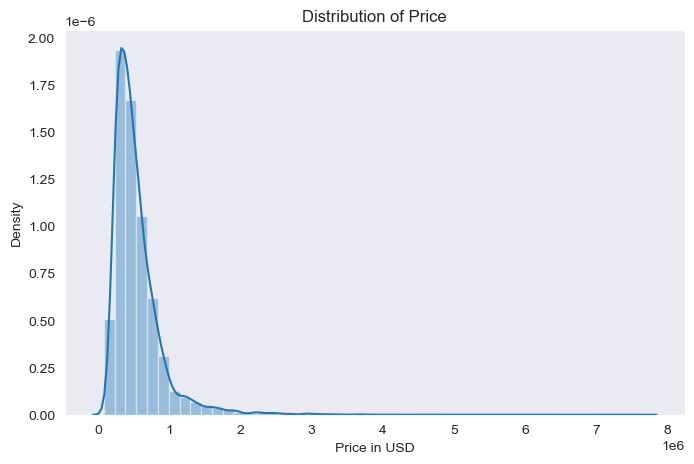

In [39]:
# View price distribution
plt.figure(figsize=(8,5))
dist=sns.distplot(df["price"])
dist.set_title("Price distribution")
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

The distribution is positively skewed, meaning that the mean is much greater than the median which should not be the case for a normal distribution.
We have to normalize the distribution.

### Normalized Price Distribution

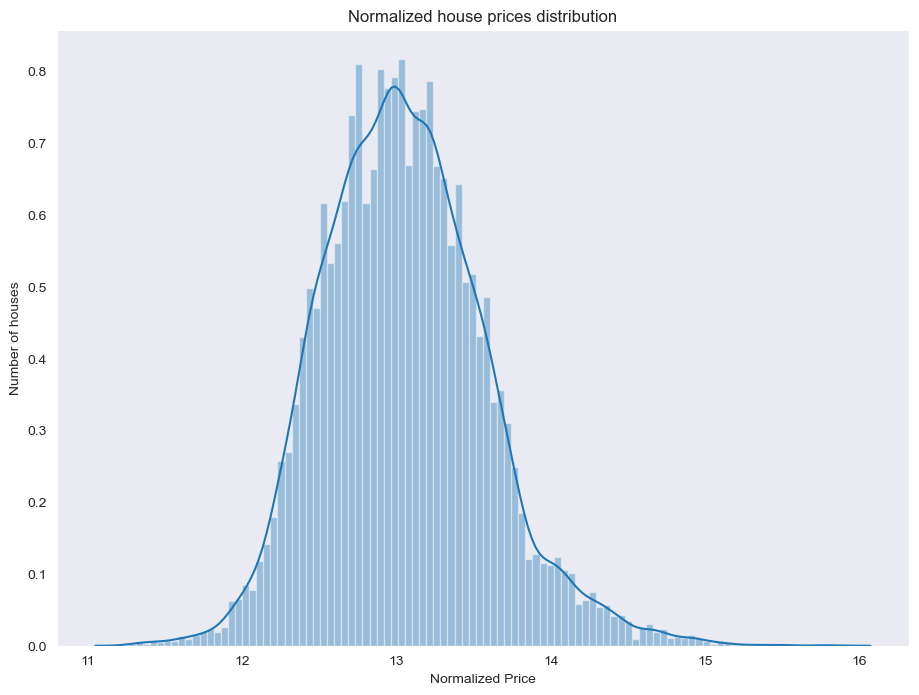

In [42]:
#Normalizing Price Distribution
fig, ax = plt.subplots(figsize=(11, 8))

sns.distplot(np.log(df['price']), bins = 100) 

ax.set_xlabel("Normalized Price")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")
plt.show()

The distribution above now assumes an inverted bell shape. We have normalized the distribution and the mean and median now fall in a central range of the data points.